# Introduction to Pandas 2, Excercise Answers


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
# sns.set()

from IPython.display import display
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "../week_2/babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'STATE.CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.sample(5)

,State,Sex,Year,Name,Count
364893,CA,M,2008,Heath,24
243259,CA,M,1920,Gonzalo,5
106150,CA,F,1988,Simone,105
283780,CA,M,1970,Boyd,17
277076,CA,M,1964,Rowan,5


## Grouping

More careful look at the most popular 2018 name in California.
In last weeks tasks for popular names, we didn't take into account the unlikely possibility that the most popular name was actually spread across both birth sexes. For example, what if in the table below it turns out that there were 300 female Noahs born in CA in 2018. In that case, Noah would actually be the most popular.

Since our queries are getting pretty long, I've stuck them inside parentheses which allows us to spread them over many lines.

In [34]:
(
babynames[babynames["Year"] == 2018]
    .sort_values(by = "Count", ascending = False)
    .head(5)
)

,State,Sex,Year,Name,Count
221194,CA,F,2018,Emma,2751
393150,CA,M,2018,Noah,2572
221195,CA,F,2018,Mia,2504
221196,CA,F,2018,Olivia,2472
393151,CA,M,2018,Liam,2415


Try to add a single line to the operation above so that each row represents the sum of male and female babies born in 2018 with that name. To do this, fill in the ??? below.

In [35]:
(
babynames[babynames["Year"] == 2018]
    .groupby("Name")
    .agg(sum)
    .sort_values(by = "Count", ascending = False)
    .head(5)
)

,State,Sex,Year,Count
Name,,,,
Emma,CA,F,2018,2751
Noah,CACA,FM,4036,2584
Mia,CA,F,2018,2504
Olivia,CA,F,2018,2472
Liam,CA,M,2018,2415


Here is another example of AI generated code. This code runs and produces an output.    Try and figure out what is wrong with this output.

You don't have to fix it. 

ANSWER:  The code doesn't actually calculate a percentages.  It just adds up and produces a sum total. 

In [ ]:
#AI Response 1: Microsoft CO-Pilot
#Here is an AI generate coding for the question: "Can you plot the percentage of babies named "John" over time?"
#This is wrong.  Run the code and determine why? 

#Can you plot the percentage of babies named "John" over time?
babynames[babynames["Name"] == "John"].groupby("Year").agg(sum).plot()

In [36]:
#Can you make a table that lists the #1 names for the years 2000-2010?

yearsToSelect = (babynames["Year"]>=2000) & (babynames["Year"]<=2010)

babynamesSorted=babynames[yearsToSelect].sort_values("Count", ascending=False)

babynamesSorted.groupby("Year").first()

,State,Sex,Name,Count
Year,,,,
2000,CA,M,Daniel,4342
2001,CA,M,Daniel,4165
2002,CA,M,Daniel,4134
2003,CA,M,Daniel,4033
2004,CA,M,Daniel,4170
2005,CA,M,Daniel,3915
2006,CA,M,Daniel,3830
2007,CA,M,Daniel,3870
2008,CA,M,Daniel,3755


In [37]:
babynames[yearsToSelect].groupby(["Year","Name"]).agg(sum)

State Sex  Count
Year Name                    
2000 Aakash     CA   M      6
     Aaliyah    CA   F    120
     Aamir      CA   M      5
     Aaron      CA   M   1362
     Aarushi    CA   F      7
...            ...  ..    ...
2010 Zyan       CA   M      6
     Zyanna     CA   F      5
     Zyanya     CA   F      9
     Zylah      CA   F      6
     Zyon       CA   M      6

[71541 rows x 3 columns]

In [38]:
#How many  babys in total were born in 1940? 
#Method 1
babynames.groupby(["Year"]).agg(sum).loc[1940]




State    CACACACACACACACACACACACACACACACACACACACACACACA...
Sex      FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...
Name     MaryPatriciaBarbaraLindaCarolJudithSharonNancy...
Count                                               102627
Name: 1940, dtype: object

In [39]:
#in 2020?
babynames.groupby(["Year"]).agg(sum).loc[2020]


State    CACACACACACACACACACACACACACACACACACACACACACACA...
Sex      FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...
Name     OliviaCamilaEmmaMiaSophiaIsabellaGiannaLunaSof...
Count                                               362882
Name: 2020, dtype: object

In [40]:
#How many  babys in total were born in 1940? 
#Method 2
total = babynames.loc[babynames['Year'] == 1940, 'Count'].sum()
print(total)

102627


In [41]:

#Can you determine the most used name in total over all time?  
#Calculate the sum of names over all years and sort
(
babynames
    .groupby(['Name'])['Count']
    .agg(sum)
    .sort_values(ascending=False)
    .head(1)
)              

Name
Michael    435716
Name: Count, dtype: int64

In [42]:
# Calculate for For males and females seperately?
most_popular_female = (
babynames
    .query("Sex=='F'")  #First select just the female babies usig query()  could do it anouther way 
    .groupby(['Name'])['Count']
    .agg(sum)
    .sort_values(ascending=False)
    .head(1)
)     

print(f"Most popular female name {most_popular_female}")

most_popular_male = (
babynames
    .query("Sex=='M'")  #First select just the male babies usig query()  could do it anouther way 
    .groupby(['Name'])['Count']
    .agg(sum)
    .sort_values(ascending=False)
    .head(1)
)     

print(f"Most popular male name {most_popular_male}")

Most popular female name Name
Jennifer    175439
Name: Count, dtype: int64
Most popular male name Name
Michael    433285
Name: Count, dtype: int64


<Axes: xlabel='Year'>

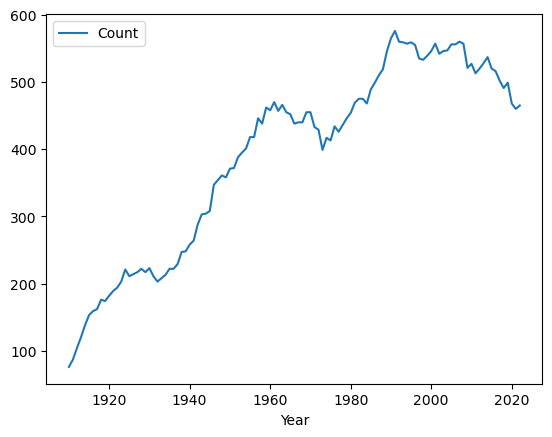

In [43]:
#Can you make a plot of the number of unique names given over the years?


(
babynames
    .groupby(["Year"])[["Count"]]  #Group by the year
    .nunique()  #calculate the number of unique values. 
    .plot()
)

# babynames.groupby(['Year','Sex'])['Name'].nunique()

<Axes: xlabel='Year'>

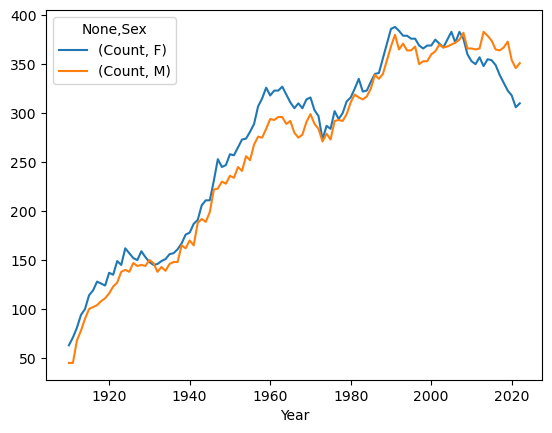

In [44]:
# If you want to do the unique names with more complicated breakdowns a pivot table can be useful.
# in order to translate from the groubpy() aggregating functions you need to pass into the pivot table the full specification
# in this case we want to use the nunique() function that is part of the Series datatype that is included in PANDAS (pd)
# building that up we use:   pd.Series.nunique
babynames_pivot = babynames.pivot_table(
    index='Year', # the rows (turned into index)
    columns='Sex', # the column values
    values=['Count'], # the field(s) to processed in each group
    aggfunc=pd.Series.nunique, # group operation
)
babynames_pivot.plot()

<Axes: xlabel='Year'>

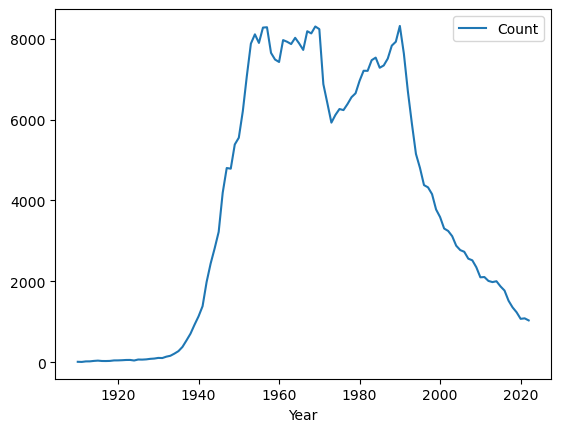

In [45]:
(
babynames
    .loc[babynames["Name"]=="Michael"]
    .groupby(["Year"])[["Count"]]  #Group by the year
    .sum()  #calculate the number of unique values. 
    .plot()
)

<Axes: xlabel='Year'>

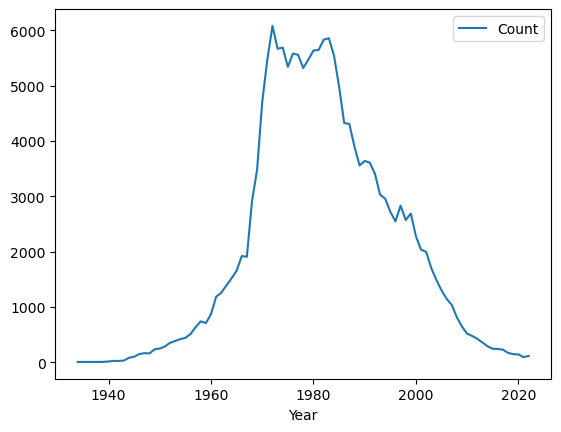

In [46]:
(
babynames
    .loc[babynames["Name"]=="Jennifer"]
    .groupby(["Year"])[["Count"]]  #Group by the year
    .sum()  #calculate the number of unique values. 
    .plot()
)